# Example of high-level interface

In [1]:
import numpy as np
import pylab as plt
import swyft
import torch
%load_ext autoreload
%autoreload 2

np.random.seed(25)
torch.manual_seed(25)

In [2]:
DEVICE = 'cuda:0'

## Toy generative model

In [3]:
def model(z, sigma = .03):
    T = np.array([[1, 1.], [0, 1.], [0, 1.]])
    n = np.random.randn(3)*sigma
    x = T.dot(z) + n
    return x

## Mock data generation

In [4]:
z0 = np.array([0.4, 0.6])
x0 = model(z0)
print(x0, z0)

[1.00684819 0.63080671 0.57481245] [0.4 0.6]


## Automatic inference 1-dim and 2-dim posteriors

In [5]:
sw = swyft.SWYFT(x0, model, zdim = 2, device = DEVICE)

In [6]:
sw.run(nrounds = 2, max_epochs=10)

Normalizations
x_mean tensor([0.9960, 0.4995, 0.4973])
x_err tensor([0.4068, 0.2884, 0.2867])
z_mean tensor([0.4971, 0.4988])
z_err tensor([0.2918, 0.2862])
Epoch: 0 []
Epoch: 1 [1.8719648476690054]
Epoch: 2 [1.8719648476690054, 1.822313813958317]
Epoch: 3 [1.8719648476690054, 1.822313813958317, 1.7346315081231296]
Epoch: 4 [1.8719648476690054, 1.822313813958317, 1.7346315081231296, 1.7312008547596633]
Epoch: 5 [1.8719648476690054, 1.822313813958317, 1.7346315081231296, 1.7312008547596633, 1.7346122926101089]
Epoch: 6 [1.8719648476690054, 1.822313813958317, 1.7346315081231296, 1.7312008547596633, 1.7346122926101089, 1.746462507173419]
Epoch: 7 [1.8719648476690054, 1.822313813958317, 1.7346315081231296, 1.7312008547596633, 1.7346122926101089, 1.746462507173419, 1.738531954586506]
Epoch: 8 [1.8719648476690054, 1.822313813958317, 1.7346315081231296, 1.7312008547596633, 1.7346122926101089, 1.746462507173419, 1.738531954586506, 1.7010668842121959]
Epoch: 9 [1.8719648476690054, 1.82231381395

/home/bmiller/swyft/swyft/core.py:227: UserWarning: Training finished by reaching max_epochs == 10.
  warn(f"Training finished by reaching max_epochs == {max_epochs}.")


Constrained posterior volume: 0.29206644444444446
Normalizations
x_mean tensor([1.0080, 0.5938, 0.5922])
x_err tensor([0.2366, 0.1197, 0.1200])
z_mean tensor([0.4154, 0.5929])
z_err tensor([0.2054, 0.1155])
Epoch: 0 []
Epoch: 1 [2.3736650263890624]
Epoch: 2 [2.3736650263890624, 2.4163722041994333]
Epoch: 3 [2.3736650263890624, 2.4163722041994333, 2.3913801666349173]
Epoch: 4 [2.3736650263890624, 2.4163722041994333, 2.3913801666349173, 2.395243954844773]
Epoch: 5 [2.3736650263890624, 2.4163722041994333, 2.3913801666349173, 2.395243954844773, 2.3770473431795835]
Epoch: 6 [2.3736650263890624, 2.4163722041994333, 2.3913801666349173, 2.395243954844773, 2.3770473431795835, 2.362865326926112]
Epoch: 7 [2.3736650263890624, 2.4163722041994333, 2.3913801666349173, 2.395243954844773, 2.3770473431795835, 2.362865326926112, 2.3527166806161404]
Epoch: 8 [2.3736650263890624, 2.4163722041994333, 2.3913801666349173, 2.395243954844773, 2.3770473431795835, 2.362865326926112, 2.3527166806161404, 2.3603177

In [7]:
sw.comb([[0, 1]], max_epochs=10)

Normalizations
x_mean tensor([1.0080, 0.5938, 0.5922])
x_err tensor([0.2366, 0.1197, 0.1200])
z_mean tensor([0.4154, 0.5929])
z_err tensor([0.2054, 0.1155])
Epoch: 0 []
Epoch: 1 [0.609357978682965]
Epoch: 2 [0.609357978682965, 0.547463791212067]
Epoch: 3 [0.609357978682965, 0.547463791212067, 0.5201143734157085]
Epoch: 4 [0.609357978682965, 0.547463791212067, 0.5201143734157085, 0.541480562184006]
Epoch: 5 [0.609357978682965, 0.547463791212067, 0.5201143734157085, 0.541480562184006, 0.5273101049242541]
Epoch: 6 [0.609357978682965, 0.547463791212067, 0.5201143734157085, 0.541480562184006, 0.5273101049242541, 0.527933300472796]
Epoch: 7 [0.609357978682965, 0.547463791212067, 0.5201143734157085, 0.541480562184006, 0.5273101049242541, 0.527933300472796, 0.5634864682797343]
Epoch: 8 [0.609357978682965, 0.547463791212067, 0.5201143734157085, 0.541480562184006, 0.5273101049242541, 0.527933300472796, 0.5634864682797343, 0.5013587619177997]
Epoch: 9 [0.609357978682965, 0.547463791212067, 0.5201

## Plot posteriors

0.99999994
1.0


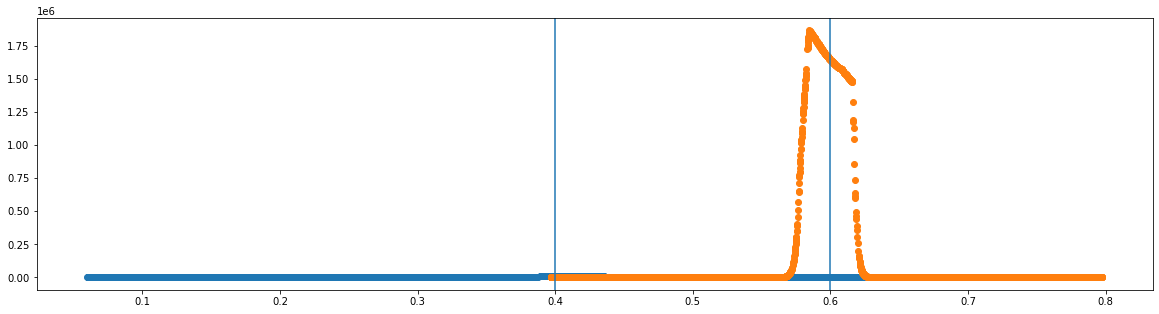

In [11]:
plt.figure(figsize=(20, 5))
for i in range(2):
    zgrid, lnLgrid = sw.posterior(i)
    plt.axvline(z0[i])
    plt.scatter(zgrid[:], np.exp(lnLgrid[:]))
    
    # Print integral
    x = zgrid
#     y = np.exp(lnLgrid)
    y = lnLgrid
    ii = np.argsort(x)
    I = np.trapz(y[ii], x[ii])
    print(I)

(0.0, 1.0)

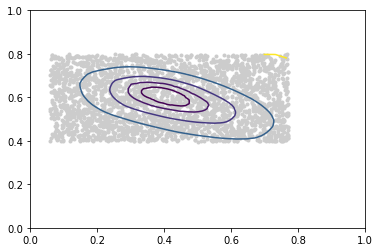

In [9]:
zgrid, lnLgrid = sw.posterior([0, 1])
plt.scatter(zgrid[:,0], zgrid[:,1], marker='.', color='0.8')
max_lnL = lnLgrid[:].max()
plt.tricontour(zgrid[:,0], zgrid[:,1], -lnLgrid+max_lnL, levels = [1, 4, 9, 16, 50])
plt.xlim([0, 1])
plt.ylim([0, 1])